# Histogram

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.10.0


# Fetching Data<a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.

In [11]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
df_can = pd.read_csv(URL)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [12]:
df_can.shape

(195, 39)

In [13]:
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [24]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.
<br><br>Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?<br>


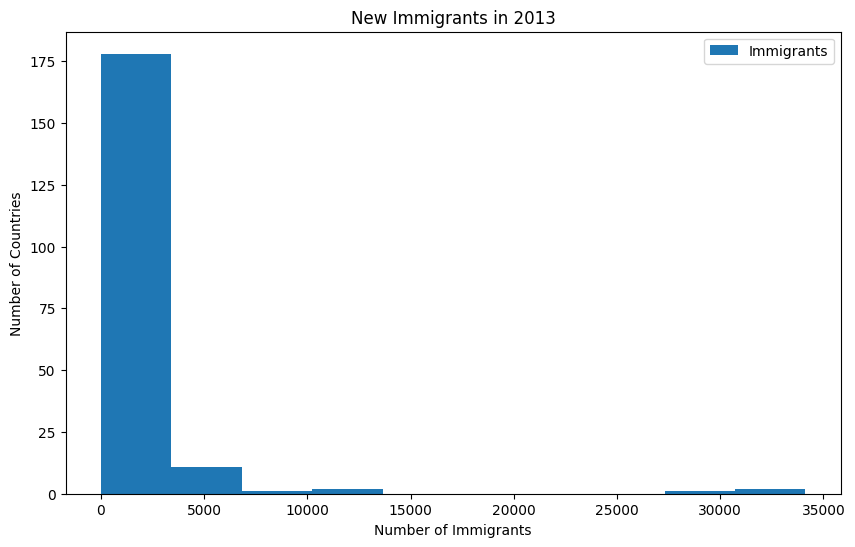

In [25]:
df_country = df_can.groupby(['Country'])['2013'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_country['2013'])
ax.set_title('New Immigrants in 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

plt.show()

Our plot doesnot match with the bars<br>By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013<br> The hist function retuns list of arrays with 1. counts and 2. bins. we can fetch that using unpacking functionality <br> and further use the bins as x-ticks


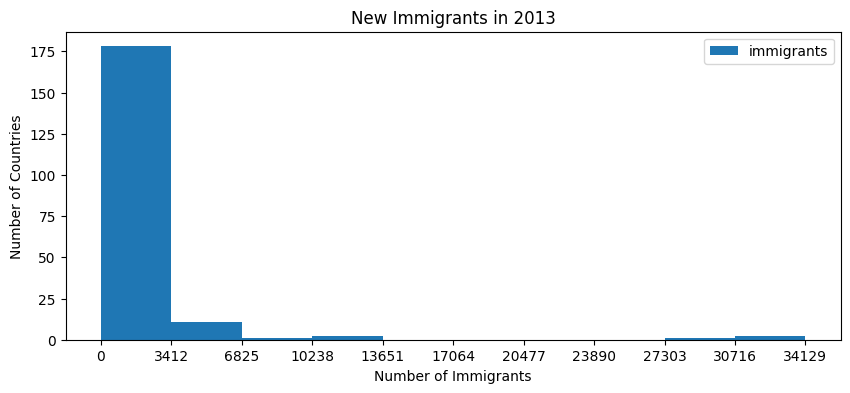

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country['2013'])

ax.set_title('New Immigrants in 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int, count[1])))
ax.legend(['immigrants'])

plt.show()

#### We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

#### What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [28]:
df = df_can.groupby(['Country'])[years].sum()
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns = df_dns.T
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


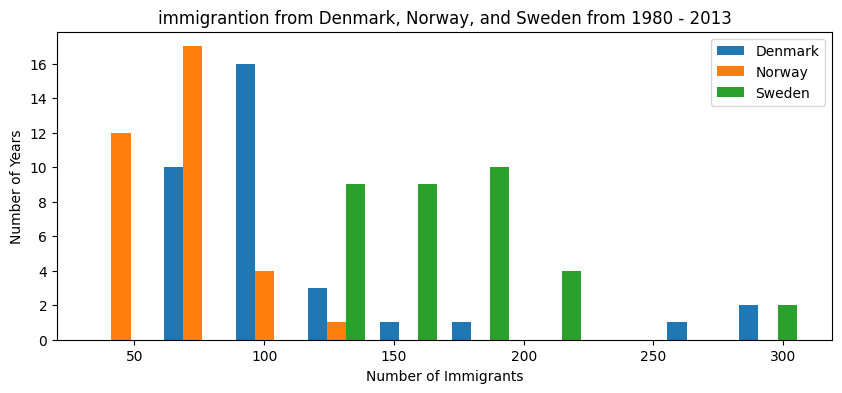

In [30]:
# create figure and axes

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('immigrantion from Denmark, Norway, and Sweden from 1980 - 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])

plt.show()

### Question: What is the immigration distribution for China and India for years 2000 to 2013?


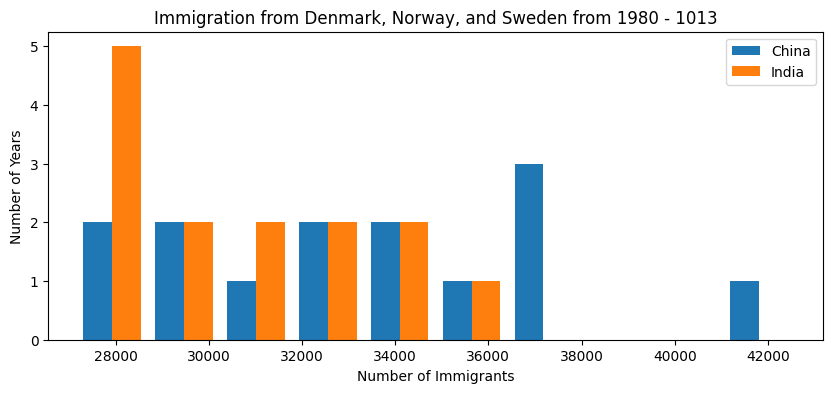

In [31]:
df = df_can.groupby(['Country'])[years].sum()
y = list(map(str, range(2000, 2014)))
df_ci = df.loc[['China', 'India'], y]
df_ci = df_ci.T

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_ci)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 1013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['China', 'India'])

plt.show()